In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold,StratifiedKFold
import sys
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [70]:
def readWaterMelon():
    df=pd.read_csv('watermelon3.csv',delimiter=',')
    df.iloc[:,-1] = pd.Categorical(df.iloc[:,-1])
    df['code'] = df.iloc[:,-1].cat.codes
    df['code']=df['code'].astype(np.int)
    
    df=df.drop([df.columns[0],df.columns[-2]],axis=1)
    
    x=df.iloc[:,-3:-1]
    y=df.iloc[:,-1]
    return x,y
    

In [76]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),algorithm="SAMME")
X,y=readWaterMelon()
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [74]:
bdt=BaggingClassifier(DecisionTreeClassifier(max_depth=2))
X,y=readWaterMelon()
bdt.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

Text(0.5, 1.0, 'Decision Boundary')

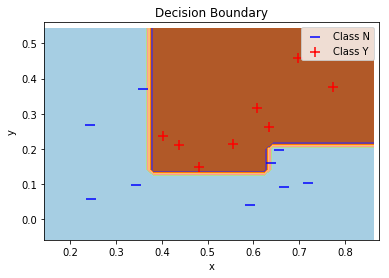

In [77]:
plot_colors = "br"
plot_step = 0.02
class_names = "NY"
markers="_+"

X=X.values
y=y.values
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c, m in zip(range(2), class_names, plot_colors,markers):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,marker=m,
                s=100, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')


Text(0.5, 1.0, 'Decision Boundary')

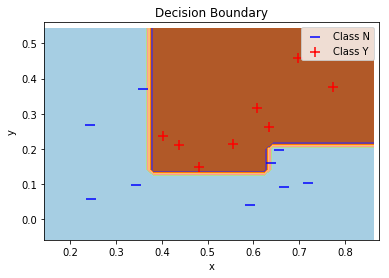